In [7]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
import matplotlib.patches as mpatches


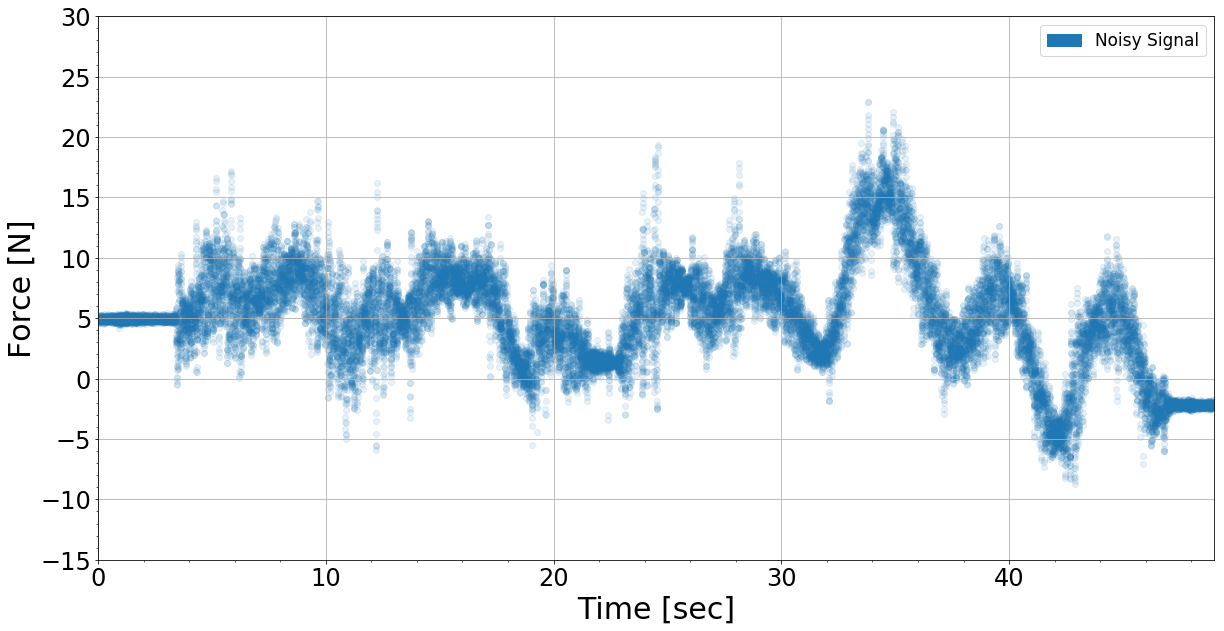

In [8]:
ft = genfromtxt('thesys_kalman_calib.csv', delimiter=';')
data = ft
blue_patch = mpatches.Patch(color='#1f77b4', label='Noisy Signal')

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time [sec]', size=30)
ax1.set_ylabel('Force [N]', size=30)

t = np.linspace(0,len(data)/600,len(data))
plt.scatter(t,data[:,1],color='#1f77b4',alpha=0.1)
plt.plot()

ax1.set_xlim([min(t[:]),max(t)])
ax1.set_ylim([-15,30])
ax1.legend(handles=[blue_patch], prop={'size': 17})

ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)
plt.minorticks_on()
plt.grid()
plt.savefig('/home/robotronics/Pictures/noisy_signal.png', format='png', dpi=100)

In [9]:
def filter(z,q,r=9):
    #intial parameters
    n_iter = len(ft)
    sz = (n_iter,) # size of array
    #z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)
    
     # truth value (typo in example at top of p. 13 calls this z)

    Q = q # process variance

    # allocate space for arrays
    xhat=np.zeros(sz)      # a posteri estimate of x
    P=np.zeros(sz)         # a posteri error estimate
    xhatminus=np.zeros(sz) # a priori estimate of x
    Pminus=np.zeros(sz)    # a priori error estimate
    K=np.zeros(sz)         # gain or blending factor

    R = r # estimate of measurement variance, change to see effect

    # intial guesses
    xhat[0] = z[0]
    P[0] = 5.0

    #print(n_iter, len(R))
    for k in range(1,n_iter):
        # time update
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1]+Q

        # measurement update
        K[k] = Pminus[k]/( Pminus[k]+R )
        xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
        P[k] = (1-K[k])*Pminus[k]

    #plt.figure()
    #plt.plot(z,'k+',label='noisy measurements')
    #plt.plot(xhat,'b-',label='a posteri estimate')
    #plt.legend()
    #plt.title('Estimate vs. iteration step', fontweight='bold')
    #plt.xlabel('Iteration')
    return xhat

In [10]:
np.std(ft,axis=0)

array([4.33424701, 4.25586431, 2.29412334, 0.30532168, 0.31216256,
       0.03062431])

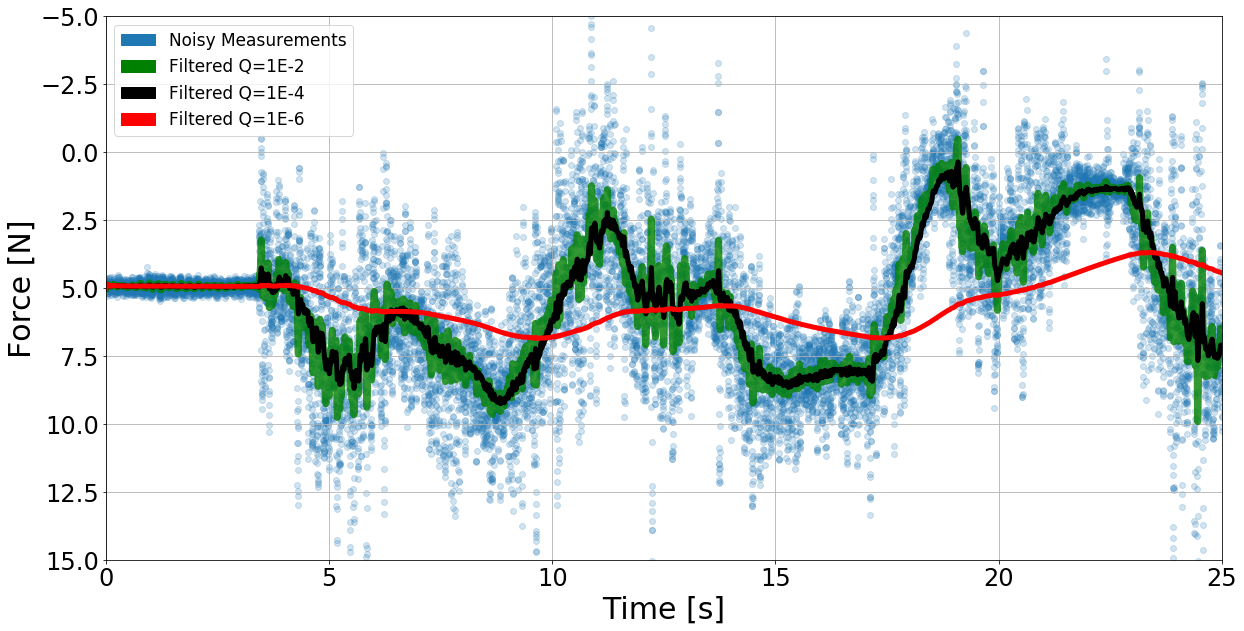

In [11]:
import matplotlib.patches as mpatches
z = ft[:,1]
blue_patch = mpatches.Patch(color='#1f77b4', label='Noisy Measurements')
green_patch = mpatches.Patch(color='green', label='Filtered Q=1E-2')
black_patch = mpatches.Patch(color='black', label='Filtered Q=1E-4')
red_patch = mpatches.Patch(color='red', label='Filtered Q=1E-6')

n = len(ft)
t = np.linspace(0,n/600,n)
fig, ax1 = plt.subplots()
ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)

ax1.set_xlabel('Time [s]', size=30)
ax1.set_ylabel('Force [N]', size=30)
plt.scatter(t,z,alpha=0.2,color='#1f77b4')
plt.plot(t,filter(z,0.01),color="green",linewidth=7.0,alpha=0.8)
plt.plot(t,filter(z,0.001),color="black",linewidth=5.0)
plt.plot(t,filter(z,0.000001),color="red",linewidth=5.0)
ax1.set_xlim([min(t[:]),25])
ax1.set_ylim([15,-5])
ax1.legend(handles=[blue_patch,green_patch,black_patch,red_patch], prop={'size': 17})

plt.grid()
plt.savefig('/home/robotronics/Pictures/noisy_F_kalman.png', format='png', dpi=100)


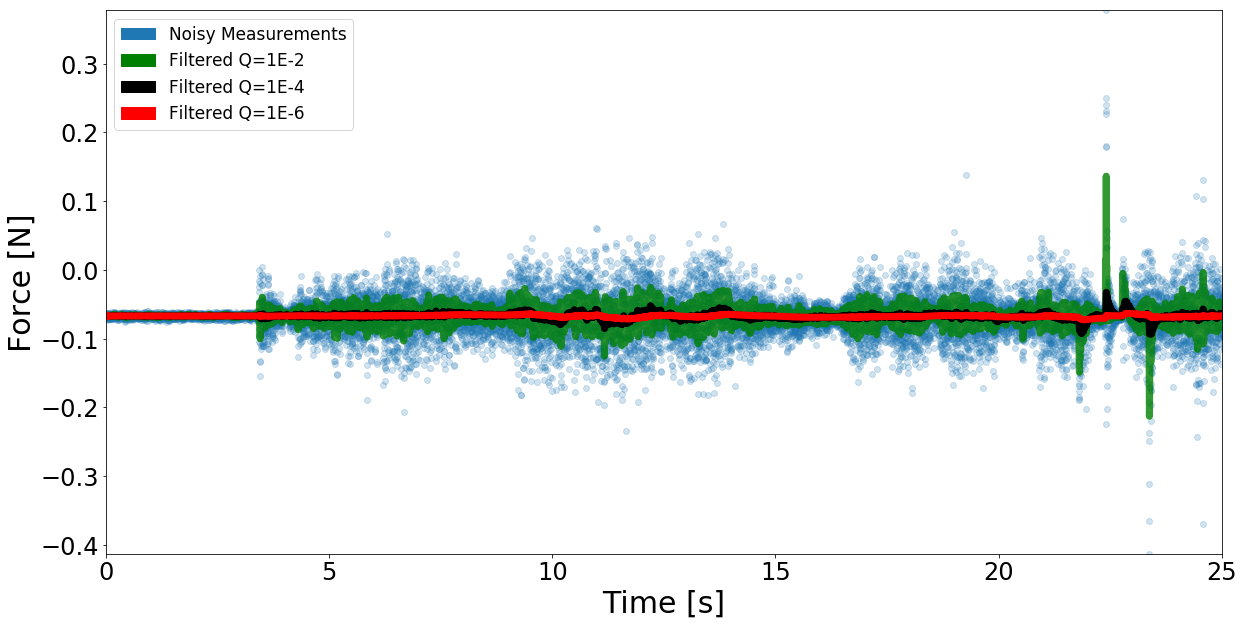

In [12]:
import matplotlib.patches as mpatches
z = ft[:,5]
blue_patch = mpatches.Patch(color='#1f77b4', label='Noisy Measurements')
green_patch = mpatches.Patch(color='green', label='Filtered Q=1E-2')
black_patch = mpatches.Patch(color='black', label='Filtered Q=1E-4')
red_patch = mpatches.Patch(color='red', label='Filtered Q=1E-6')

n = len(ft)
t = np.linspace(0,n/600,n)
fig, ax1 = plt.subplots()
ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)

ax1.set_xlabel('Time [s]', size=30)
ax1.set_ylabel('Force [N]', size=30)
plt.scatter(t,z,alpha=0.2,color='#1f77b4')
plt.plot(t,filter(z,0.01,0.3),color="green",linewidth=7.0,alpha=0.8)
plt.plot(t,filter(z,0.0001,0.3),color="black",linewidth=7.0)
plt.plot(t,filter(z,0.000001,0.3),color="red",linewidth=7.0)
ax1.set_xlim([min(t[:]),25])
ax1.set_ylim([min(z),max(z)])
ax1.legend(handles=[blue_patch,green_patch,black_patch,red_patch], prop={'size': 17})
plt.savefig('noisy_T_kalman.eps', format='eps', dpi=1000)


/home/robotronics/.local/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


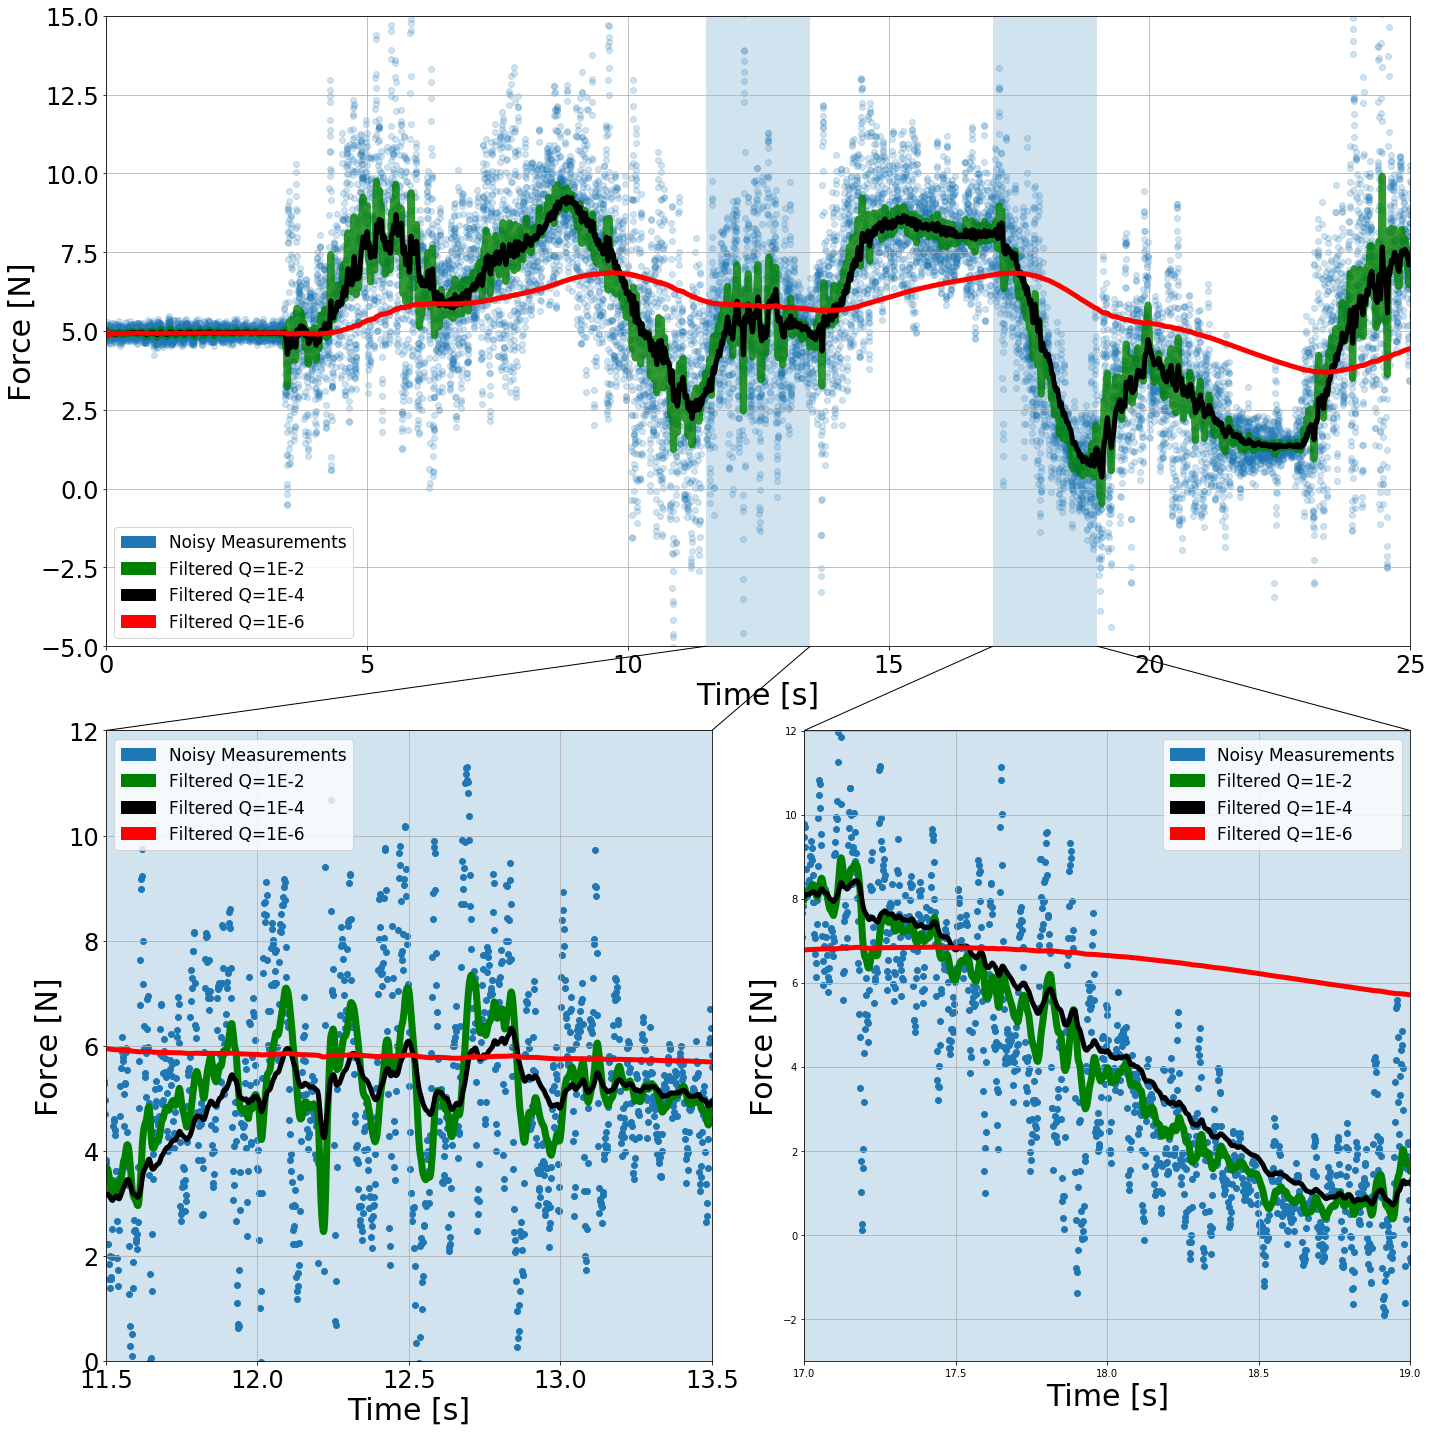

In [13]:
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.transforms import Bbox, TransformedBbox, \
    blended_transform_factory

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch
plt.rcParams['figure.figsize'] = (20, 20)

def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1) * 0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1b, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(True)

    return c1, c2, bbox_patch1, bbox_patch2, p

def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes
    (xmin,xmax) : the limits of the colored area in both plot axes.

    connect ax1 & ax2. The x-range of (xmin, xmax) in both axes will
    be marked.  The keywords parameters will be used ti create
    patches.

    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.set_xlim(xmin, xmax)
    major_ticks = np.linspace(xmin, xmax,5)
    ax2.set_xticks(major_ticks)

    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

z = ft[:,1]
blue_patch = mpatches.Patch(color='#1f77b4', label='Noisy Measurements')
green_patch = mpatches.Patch(color='green', label='Filtered Q=1E-2')
black_patch = mpatches.Patch(color='black', label='Filtered Q=1E-4')
red_patch = mpatches.Patch(color='red', label='Filtered Q=1E-6')

n = len(ft)
t = np.linspace(0,n/600,n)
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)

ax1.set_xlabel('Time [s]', size=30)
ax1.set_ylabel('Force [N]', size=30)
ax1.scatter(t,z,alpha=0.2,color='#1f77b4')
ax1.plot(t,filter(z,0.01),color="green",linewidth=7.0,alpha=0.8)
ax1.plot(t,filter(z,0.001),color="black",linewidth=5.0)
ax1.plot(t,filter(z,0.000001),color="red",linewidth=5.0)
ax1.set_xlim([min(t[:]),25])
ax1.set_ylim([-5,15])
ax1.legend(handles=[blue_patch,green_patch,black_patch,red_patch], prop={'size': 17})
ax1.grid()

ax2 = plt.subplot(gs[1, 0])
zoom_effect01(ax1, ax2, 11.5, 13.5)
ax2.set_xlabel('Time [s]', size=30)
ax2.set_ylabel('Force [N]', size=30)
ax2.scatter(t,z,color='#1f77b4')
ax2.plot(t,filter(z,0.01),color="green",linewidth=7.0)
ax2.plot(t,filter(z,0.001),color="black",linewidth=5.0)
ax2.plot(t,filter(z,0.000001),color="red",linewidth=5.0)
ax2.set_ylim([0,12])
ax2.legend(handles=[blue_patch,green_patch,black_patch,red_patch], prop={'size': 17})
ax2.grid()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 24)

ax3 = plt.subplot(gs[1, 1])
zoom_effect01(ax1, ax3, 17, 19)
ax3.set_xlabel('Time [s]', size=30)
ax3.set_ylabel('Force [N]', size=30)
ax3.scatter(t,z,color='#1f77b4')
ax3.plot(t,filter(z,0.01),color="green",linewidth=7.0)
ax3.plot(t,filter(z,0.001),color="black",linewidth=5.0)
ax3.plot(t,filter(z,0.000001),color="red",linewidth=5.0)
ax3.set_ylim([-3,12])
ax3.legend(handles=[blue_patch,green_patch,black_patch,red_patch], prop={'size': 17})
ax2.tick_params(axis = 'both', which = 'major', labelsize = 24)

ax3.grid()

plt.savefig('/home/robotronics/Pictures/noisy_F_kalman.png', format='png', dpi=100)